In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import seaborn as sns

In [50]:
df = pd.read_csv("clustered_villages.csv")
df.head()

,VILLAGE NAME,VILLAGE PIN CODE,NUMBER OF TOTAL POPULATION,NUMBER OF MALE,NUMBER OF FEMALE,NUMBER OF TOTAL HOUSEHOLD,NUMBER OF HOUSEHOLDS ENGAGED MAJORLY IN FARM ACTIVITIES,NUMBER OF HOUSEHOLDS ENGAGED MAJORLY IN NON-FARM ACTIVITIES,"TOTAL CULTIVABLE AREA (IN HECTARES), IF IN ACRES DIVIDE BY 2.47",NUMBER OF FARMERS USING DRIP/SPRINKLER IRRIGATION,...,NUMBER OF HOUSEHOLDS WHO ARE IN THE PERMANENT WAIT LIST,NUMBER OF HOUSEHOLDS WHO GOT BENEFIT FROM ANY STATE SPECIFIC HOUSING SCHEME?,NUMBER OF HOUSEHOLDS WHO ARE IN THE PERMANENT WAIT LIST OF STATE SPECIFIC HOUSING SCHEME?,NUMBER OF HOUSEHOLDS AVAILING THE BENEFITS UNDER SAUBHAGYA SCHEME,AVAILABILITY OF VOCATIONAL TRAINING CENTRE/POLYTECHNIC/ITI/RSETI /DDU-GKY,TOTAL NUMBER OF FARMERS,NUMBER OF FARMERS RECEIVED THE SOIL TESTING REPORT,TOTAL APPROVED LABOUR BUDGET FOR THE YEAR 2018-19,NUMBER OF HOUSEHOLDS HAVING PIPED WATER CONNECTION,Cluster
0,Payam,670704,15429,7425,8004,3667,1285,2301,2348.0,12,...,181,19,0,3,131,2410,18,13595800.0,127,3
1,Vilamana,670706,14059,6944,7115,3206,1368,1783,2270.0,24,...,121,33,0,3,76,2584,14,9063865.0,157,3
2,Chowwara (CT),683580,15098,7446,7652,3619,772,2124,655.0,11,...,0,39,10,2328,36,4702,22,13088500.0,1018,4
3,Thekkumbhagom (CT),683580,10610,5308,5302,2527,444,1421,498.0,8,...,0,30,8,1682,26,3872,20,9873781.0,752,4
4,Kalady (CT),683574,14323,7085,7238,3593,407,1390,265.0,7,...,0,16,4,7,4,2843,20,50500000.0,2499,3


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1594 entries, 0 to 1593
Data columns (total 24 columns):
 #   Column                                                                                     Non-Null Count  Dtype  
---  ------                                                                                     --------------  -----  
 0   VILLAGE NAME                                                                               1594 non-null   object 
 1   VILLAGE PIN CODE                                                                           1594 non-null   int64  
 2   NUMBER OF TOTAL POPULATION                                                                 1594 non-null   int64  
 3   NUMBER OF MALE                                                                             1594 non-null   int64  
 4   NUMBER OF FEMALE                                                                           1594 non-null   int64  
 5   NUMBER OF TOTAL HOUSEHOLD                       

In [52]:
kerala_df = df.drop(columns="VILLAGE PIN CODE")

In [53]:
kerala_df.head()

,VILLAGE NAME,NUMBER OF TOTAL POPULATION,NUMBER OF MALE,NUMBER OF FEMALE,NUMBER OF TOTAL HOUSEHOLD,NUMBER OF HOUSEHOLDS ENGAGED MAJORLY IN FARM ACTIVITIES,NUMBER OF HOUSEHOLDS ENGAGED MAJORLY IN NON-FARM ACTIVITIES,"TOTAL CULTIVABLE AREA (IN HECTARES), IF IN ACRES DIVIDE BY 2.47",NUMBER OF FARMERS USING DRIP/SPRINKLER IRRIGATION,"TOTAL AREA IRRIGATED (IN HECTARE), IF IN ACRES DIVIDE BY 2.47",...,NUMBER OF HOUSEHOLDS WHO ARE IN THE PERMANENT WAIT LIST,NUMBER OF HOUSEHOLDS WHO GOT BENEFIT FROM ANY STATE SPECIFIC HOUSING SCHEME?,NUMBER OF HOUSEHOLDS WHO ARE IN THE PERMANENT WAIT LIST OF STATE SPECIFIC HOUSING SCHEME?,NUMBER OF HOUSEHOLDS AVAILING THE BENEFITS UNDER SAUBHAGYA SCHEME,AVAILABILITY OF VOCATIONAL TRAINING CENTRE/POLYTECHNIC/ITI/RSETI /DDU-GKY,TOTAL NUMBER OF FARMERS,NUMBER OF FARMERS RECEIVED THE SOIL TESTING REPORT,TOTAL APPROVED LABOUR BUDGET FOR THE YEAR 2018-19,NUMBER OF HOUSEHOLDS HAVING PIPED WATER CONNECTION,Cluster
0,Payam,15429,7425,8004,3667,1285,2301,2348.0,12,234.0,...,181,19,0,3,131,2410,18,13595800.0,127,3
1,Vilamana,14059,6944,7115,3206,1368,1783,2270.0,24,228.0,...,121,33,0,3,76,2584,14,9063865.0,157,3
2,Chowwara (CT),15098,7446,7652,3619,772,2124,655.0,11,351.0,...,0,39,10,2328,36,4702,22,13088500.0,1018,4
3,Thekkumbhagom (CT),10610,5308,5302,2527,444,1421,498.0,8,255.0,...,0,30,8,1682,26,3872,20,9873781.0,752,4
4,Kalady (CT),14323,7085,7238,3593,407,1390,265.0,7,181.0,...,0,16,4,7,4,2843,20,50500000.0,2499,3


In [54]:
kerala_df.describe()

,NUMBER OF TOTAL POPULATION,NUMBER OF MALE,NUMBER OF FEMALE,NUMBER OF TOTAL HOUSEHOLD,NUMBER OF HOUSEHOLDS ENGAGED MAJORLY IN FARM ACTIVITIES,NUMBER OF HOUSEHOLDS ENGAGED MAJORLY IN NON-FARM ACTIVITIES,"TOTAL CULTIVABLE AREA (IN HECTARES), IF IN ACRES DIVIDE BY 2.47",NUMBER OF FARMERS USING DRIP/SPRINKLER IRRIGATION,"TOTAL AREA IRRIGATED (IN HECTARE), IF IN ACRES DIVIDE BY 2.47","TOTAL UNIRRIGATED LAND AREA (IN HECTARES), IF IN ACRES DIVIDE BY 2.47",...,NUMBER OF HOUSEHOLDS WHO ARE IN THE PERMANENT WAIT LIST,NUMBER OF HOUSEHOLDS WHO GOT BENEFIT FROM ANY STATE SPECIFIC HOUSING SCHEME?,NUMBER OF HOUSEHOLDS WHO ARE IN THE PERMANENT WAIT LIST OF STATE SPECIFIC HOUSING SCHEME?,NUMBER OF HOUSEHOLDS AVAILING THE BENEFITS UNDER SAUBHAGYA SCHEME,AVAILABILITY OF VOCATIONAL TRAINING CENTRE/POLYTECHNIC/ITI/RSETI /DDU-GKY,TOTAL NUMBER OF FARMERS,NUMBER OF FARMERS RECEIVED THE SOIL TESTING REPORT,TOTAL APPROVED LABOUR BUDGET FOR THE YEAR 2018-19,NUMBER OF HOUSEHOLDS HAVING PIPED WATER CONNECTION,Cluster
count,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000,1594.00000,...,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000,1.594000e+03,1594.000000,1594.000000
mean,16291.126098,7816.420954,8474.333752,3917.585320,1025.767880,1918.224592,1360.281605,34.474279,271.875119,958.43657,...,36.917189,59.510038,55.217691,30.718319,61.549561,2426.868256,180.553325,3.073639e+07,1641.777917,2.037641
std,10037.859562,4819.406913,5232.728414,2409.630296,1025.025173,1715.457623,1140.740659,124.694961,347.632878,984.63149,...,80.364124,82.203476,116.187100,193.150977,186.086289,1919.664512,355.390799,5.428102e+07,1661.221515,1.150818
min,16.000000,7.000000,9.000000,5.000000,0.000000,0.000000,0.013000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8782.500000,4275.750000,4539.250000,2114.250000,270.250000,702.500000,630.527500,2.000000,54.000000,287.67750,...,1.000000,12.000000,1.000000,0.000000,3.000000,1028.500000,12.000000,7.169438e+06,352.000000,1.000000
50%,14992.000000,7146.000000,7787.500000,3623.500000,700.000000,1388.000000,1149.050000,7.000000,160.795000,703.50000,...,9.000000,34.000000,14.000000,1.000000,19.000000,2000.000000,50.500000,1.574850e+07,1137.000000,3.000000
75%,22463.750000,10736.000000,11598.500000,5513.500000,1437.500000,2626.750000,1791.052500,20.000000,350.000000,1366.85000,...,34.750000,78.000000,63.750000,11.000000,52.750000,3330.000000,180.000000,3.466200e+07,2393.250000,3.000000
max,55535.000000,26727.000000,28808.000000,17321.000000,7546.000000,9997.000000,9999.000000,2356.000000,3736.000000,9957.87000,...,1200.000000,1255.000000,1424.000000,4939.000000,3180.000000,15000.000000,3070.000000,8.012150e+08,10576.000000,4.000000


#### Changing the column names to short names 

In [55]:
kerala_df.columns = ['Village', 'Total Population', 'Male', 'Female', 'Total HH', 'HH Farm', 'HH Non-Farm',
              'Cultivable Area', 'Drip/Sprinkler Farmers', 'Irrigated Area', 'Unirrigated Area',
              'Kuccha HH', 'PMAY HH', 'Waitlisted HH', 'Benefitted HH', 'Waitlisted Specific HH',
              'Saubhagya HH', 'Vocational Training', 'Total Farmers', 'Soil Testing Farmers',
              'Labour Budget', 'Piped Water HH', 'Cluster']


In [56]:
kerala_df

,Village,Total Population,Male,Female,Total HH,HH Farm,HH Non-Farm,Cultivable Area,Drip/Sprinkler Farmers,Irrigated Area,...,Waitlisted HH,Benefitted HH,Waitlisted Specific HH,Saubhagya HH,Vocational Training,Total Farmers,Soil Testing Farmers,Labour Budget,Piped Water HH,Cluster
0,Payam,15429,7425,8004,3667,1285,2301,2348.00,12,234.00,...,181,19,0,3,131,2410,18,13595800.0,127,3
1,Vilamana,14059,6944,7115,3206,1368,1783,2270.00,24,228.00,...,121,33,0,3,76,2584,14,9063865.0,157,3
2,Chowwara (CT),15098,7446,7652,3619,772,2124,655.00,11,351.00,...,0,39,10,2328,36,4702,22,13088500.0,1018,4
3,Thekkumbhagom (CT),10610,5308,5302,2527,444,1421,498.00,8,255.00,...,0,30,8,1682,26,3872,20,9873781.0,752,4
4,Kalady (CT),14323,7085,7238,3593,407,1390,265.00,7,181.00,...,0,16,4,7,4,2843,20,50500000.0,2499,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589,Paippad (CT),941,460,481,234,112,78,47.50,3,2.15,...,0,2,6,1,0,126,14,1200000.0,46,3
1590,Thrikkovilvattom (CT),39836,19085,20751,10725,6631,3894,805.52,5,518.00,...,18,101,190,31,0,10921,86,22939800.0,303,1
1591,Thazhuthala (CT),21451,10277,11174,5776,3569,1916,433.75,2,342.00,...,14,61,112,8,0,5879,46,12352200.0,182,1
1592,Elampalloor (CT),30278,14394,15884,8057,2850,4800,724.00,4,232.00,...,24,221,380,7,12,3268,155,45000000.0,3674,1


In [57]:
# HH --> Househould
kerala_df.columns

Index(['Village', 'Total Population', 'Male', 'Female', 'Total HH', 'HH Farm',
       'HH Non-Farm', 'Cultivable Area', 'Drip/Sprinkler Farmers',
       'Irrigated Area', 'Unirrigated Area', 'Kuccha HH', 'PMAY HH',
       'Waitlisted HH', 'Benefitted HH', 'Waitlisted Specific HH',
       'Saubhagya HH', 'Vocational Training', 'Total Farmers',
       'Soil Testing Farmers', 'Labour Budget', 'Piped Water HH', 'Cluster'],
      dtype='object')

In [58]:
kerala_df.to_csv('New_datasets.csv')

In [59]:
numerical_df = kerala_df.drop(columns=['Village'])

## Normalising the dataset

In [60]:
Village_df = kerala_df.drop(columns=['Village', 'Cluster'])
Village_df.head()

,Total Population,Male,Female,Total HH,HH Farm,HH Non-Farm,Cultivable Area,Drip/Sprinkler Farmers,Irrigated Area,Unirrigated Area,...,PMAY HH,Waitlisted HH,Benefitted HH,Waitlisted Specific HH,Saubhagya HH,Vocational Training,Total Farmers,Soil Testing Farmers,Labour Budget,Piped Water HH
0,15429,7425,8004,3667,1285,2301,2348.0,12,234.0,2004.0,...,25,181,19,0,3,131,2410,18,13595800.0,127
1,14059,6944,7115,3206,1368,1783,2270.0,24,228.0,1904.0,...,11,121,33,0,3,76,2584,14,9063865.0,157
2,15098,7446,7652,3619,772,2124,655.0,11,351.0,47.0,...,10,0,39,10,2328,36,4702,22,13088500.0,1018
3,10610,5308,5302,2527,444,1421,498.0,8,255.0,33.0,...,8,0,30,8,1682,26,3872,20,9873781.0,752
4,14323,7085,7238,3593,407,1390,265.0,7,181.0,63.0,...,2,0,16,4,7,4,2843,20,50500000.0,2499


In [61]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the dataset
normalized_data = scaler.fit_transform(Village_df)

# Convert the normalized array back to a DataFrame

# Convert the normalized array back to a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=Village_df.columns)


# Display the first few rows of the normalized DataFrame
print(normalized_df.head())

   Total Population      Male    Female  Total HH   HH Farm  HH Non-Farm  \
0         -0.085914 -0.081243 -0.089911 -0.104026  0.252983     0.223203   
1         -0.222441 -0.181079 -0.259857 -0.295402  0.333982    -0.078852   
2         -0.118900 -0.076884 -0.157201 -0.123952 -0.247650     0.119991   
3         -0.566147 -0.520647 -0.606439 -0.577276 -0.567743    -0.289940   
4         -0.196132 -0.151813 -0.236344 -0.134746 -0.603851    -0.308017   

   Cultivable Area  Drip/Sprinkler Farmers  Irrigated Area  Unirrigated Area  \
0         0.866129               -0.180291       -0.108986          1.062216   
1         0.797731               -0.084026       -0.126251          0.960624   
2        -0.618460               -0.188313        0.227682         -0.925953   
3        -0.756133               -0.212379       -0.048558         -0.940176   
4        -0.960451               -0.220401       -0.261493         -0.909698   

   ...   PMAY HH  Waitlisted HH  Benefitted HH  Waitlisted Spe

In [62]:
normalized_df.shape

(1594, 21)

In [63]:
normalized_df.columns

Index(['Total Population', 'Male', 'Female', 'Total HH', 'HH Farm',
       'HH Non-Farm', 'Cultivable Area', 'Drip/Sprinkler Farmers',
       'Irrigated Area', 'Unirrigated Area', 'Kuccha HH', 'PMAY HH',
       'Waitlisted HH', 'Benefitted HH', 'Waitlisted Specific HH',
       'Saubhagya HH', 'Vocational Training', 'Total Farmers',
       'Soil Testing Farmers', 'Labour Budget', 'Piped Water HH'],
      dtype='object')

### Z-SCORE

In [64]:
import pandas as pd
import numpy as np

# Assuming you have your data loaded into a pandas DataFrame named 'normalized_df'
numerical_columns = ['Total Population', 'Male', 'Female', 'Total HH', 'HH Farm',
       'HH Non-Farm', 'Cultivable Area', 'Drip/Sprinkler Farmers',
       'Irrigated Area', 'Unirrigated Area', 'Kuccha HH', 'PMAY HH',
       'Waitlisted HH', 'Benefitted HH', 'Waitlisted Specific HH',
       'Saubhagya HH', 'Vocational Training', 'Total Farmers',
       'Soil Testing Farmers', 'Labour Budget', 'Piped Water HH']


def calculate_z_scores(normalized_df, columns):

  kerala_df_zscores = normalized_df.copy()
  for col in columns:
    # Check if the column exists before accessing it
    if col in normalized_df.columns:
      mean = normalized_df[col].mean()
      std = normalized_df[col].std()
      kerala_df_zscores[col + '_zscore'] = (normalized_df[col] - mean) / std
  return kerala_df_zscores

# Filter only numerical columns for z-score calculation (assuming 'object' dtype indicates strings)
numerical_kerala_df = normalized_df[numerical_columns]

# Check if any numerical columns are missing
missing_cols = [col for col in numerical_columns if col not in numerical_kerala_df.columns]
if missing_cols:
  print(f"Warning: These columns are missing numerical data and will be excluded: {missing_cols}")

# Proceed with z-score calculation on the numerical DataFrame
kerala_df_with_zscores = calculate_z_scores(numerical_kerala_df.copy(), numerical_columns)

# Print the DataFrame with added z-score columns
kerala_df_with_zscores

,Total Population,Male,Female,Total HH,HH Farm,HH Non-Farm,Cultivable Area,Drip/Sprinkler Farmers,Irrigated Area,Unirrigated Area,...,PMAY HH_zscore,Waitlisted HH_zscore,Benefitted HH_zscore,Waitlisted Specific HH_zscore,Saubhagya HH_zscore,Vocational Training_zscore,Total Farmers_zscore,Soil Testing Farmers_zscore,Labour Budget_zscore,Piped Water HH_zscore
0,-0.085914,-0.081243,-0.089911,-0.104026,0.252983,0.223203,0.866129,-0.180291,-0.108986,1.062216,...,0.327872,1.792875,-0.492802,-0.475248,-0.143506,0.373216,-0.008787,-0.457393,-0.315775,-0.911846
1,-0.222441,-0.181079,-0.259857,-0.295402,0.333982,-0.078852,0.797731,-0.084026,-0.126251,0.960624,...,0.012248,1.046273,-0.322493,-0.475248,-0.143506,0.077655,0.081854,-0.468648,-0.399265,-0.893787
2,-0.118900,-0.076884,-0.157201,-0.123952,-0.247650,0.119991,-0.618460,-0.188313,0.227682,-0.925953,...,-0.010296,-0.459374,-0.249503,-0.389180,11.893710,-0.137300,1.185172,-0.446138,-0.325121,-0.375494
3,-0.566147,-0.520647,-0.606439,-0.577276,-0.567743,-0.289940,-0.756133,-0.212379,-0.048558,-0.940176,...,-0.055385,-0.459374,-0.358988,-0.406394,8.549176,-0.191038,0.752804,-0.451766,-0.384345,-0.535617
4,-0.196132,-0.151813,-0.236344,-0.134746,-0.603851,-0.308017,-0.960451,-0.220401,-0.261493,-0.909698,...,-0.190653,-0.459374,-0.529297,-0.440821,-0.122797,-0.309263,0.216773,-0.451766,0.364098,0.516019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589,-1.529703,-1.526895,-1.528045,-1.529173,-0.891739,-1.073068,-1.151176,-0.252489,-0.776134,-0.937230,...,-0.168108,-0.459374,-0.699606,-0.423607,-0.153861,-0.330758,-1.198578,-0.468648,-0.544139,-0.960605
1590,2.346343,2.338901,2.346867,2.825973,5.470101,1.152110,-0.486470,-0.236445,0.708224,-0.681602,...,-0.235742,-0.235393,0.504723,1.160045,0.001458,-0.330758,4.424800,-0.266055,-0.143634,-0.805900
1591,0.514203,0.510717,0.516081,0.771487,2.481920,-0.001297,-0.812474,-0.260511,0.201784,-0.880490,...,-0.235742,-0.285167,0.018125,0.488714,-0.117619,-0.330758,1.798300,-0.378607,-0.338685,-0.878738
1592,1.393849,1.365239,1.416468,1.718402,1.780253,1.680414,-0.557954,-0.244467,-0.114741,-0.473866,...,-0.235742,-0.160733,1.964515,2.795339,-0.122797,-0.266272,0.438166,-0.071902,0.262773,1.223330


##### Counting the total number of outliers in each feature

In [65]:
def count_outliers(df_with_zscores, threshold=3):
    # Initialize an empty dictionary to store outlier counts for each column
    outlier_counts = {}

    # Iterate over each column in the DataFrame
    for col in df_with_zscores.columns:
        # Check if the column name ends with '_zscore' indicating it's a z-score column
        if col.endswith('_zscore'):
            # Count the number of outliers in the column (values beyond the threshold)
            outliers = df_with_zscores[df_with_zscores[col] > threshold]
            outlier_counts[col[:-7]] = len(outliers)

    return outlier_counts

# Calculate the z-scores and count outliers
kerala_df_with_zscores = calculate_z_scores(numerical_kerala_df.copy(), numerical_columns)
outlier_counts = count_outliers(kerala_df_with_zscores)

# Print the outlier counts for each column
for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers")

Total Population: 9 outliers
Male: 10 outliers
Female: 7 outliers
Total HH: 5 outliers
HH Farm: 27 outliers
HH Non-Farm: 24 outliers
Cultivable Area: 28 outliers
Drip/Sprinkler Farmers: 24 outliers
Irrigated Area: 37 outliers
Unirrigated Area: 24 outliers
Kuccha HH: 13 outliers
PMAY HH: 7 outliers
Waitlisted HH: 34 outliers
Benefitted HH: 31 outliers
Waitlisted Specific HH: 32 outliers
Saubhagya HH: 13 outliers
Vocational Training: 18 outliers
Total Farmers: 24 outliers
Soil Testing Farmers: 36 outliers
Labour Budget: 31 outliers
Piped Water HH: 23 outliers


### IQR

Total number of outliers detected: 62


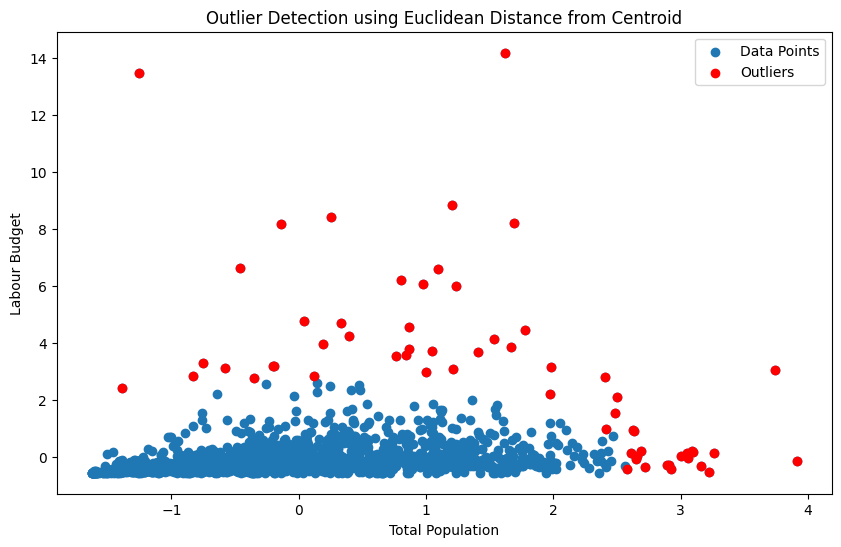

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming normalized_df is your DataFrame with the given columns

# Calculate the centroid of the dataset
centroid = normalized_df.mean()

# Calculate the Euclidean distance from each data point to the centroid
distances = np.linalg.norm(normalized_df[['Total Population', 'Labour Budget']] - centroid[['Total Population', 'Labour Budget']], axis=1)

# Define the normal data range using IQR
Q1 = np.percentile(distances, 25)
Q3 = np.percentile(distances, 75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identify outliers
outliers = normalized_df[distances > upper_limit]

# Count the number of outliers
num_outliers = len(outliers)
print("Total number of outliers detected:", num_outliers)

# Plot data points
plt.figure(figsize=(10, 6))
plt.scatter(normalized_df['Total Population'], normalized_df['Labour Budget'], label='Data Points')
plt.scatter(outliers['Total Population'], outliers['Labour Budget'], color='red', label='Outliers')
# plt.scatter(centroid['Total Population'], centroid['Labour Budget'], color='green', label='Centroid', marker='x', s=100)
plt.xlabel('Total Population')
plt.ylabel('Labour Budget')
plt.title('Outlier Detection using Euclidean Distance from Centroid')
plt.legend()
# plt.grid(True)
plt.show()

### ISOLATION FOREST

In [67]:
from sklearn.ensemble import IsolationForest

# Assuming normalized_df is your DataFrame with the columns 'Soil Testing Farmers' and 'Labour Budget'

# Select the columns of interest
selected_columns = ['Total HH', 'PMAY HH']
data = normalized_df[selected_columns]

# Create an Isolation Forest model
isolation_forest = IsolationForest(random_state=42)

# Fit the model on the data
isolation_forest.fit(data)

# Predict outliers/anomalies
outliers = isolation_forest.predict(data)

# Anomaly predictions: 1 for inliers, -1 for outliers
print(outliers)

# Count the number of outliers (-1) and inliers (1)
total_outliers = (outliers == -1).sum()
total_inliers = (outliers == 1).sum()

print("Total outliers:", total_outliers)
print("Total inliers:", total_inliers)



[1 1 1 ... 1 1 1]
Total outliers: 238
Total inliers: 1356


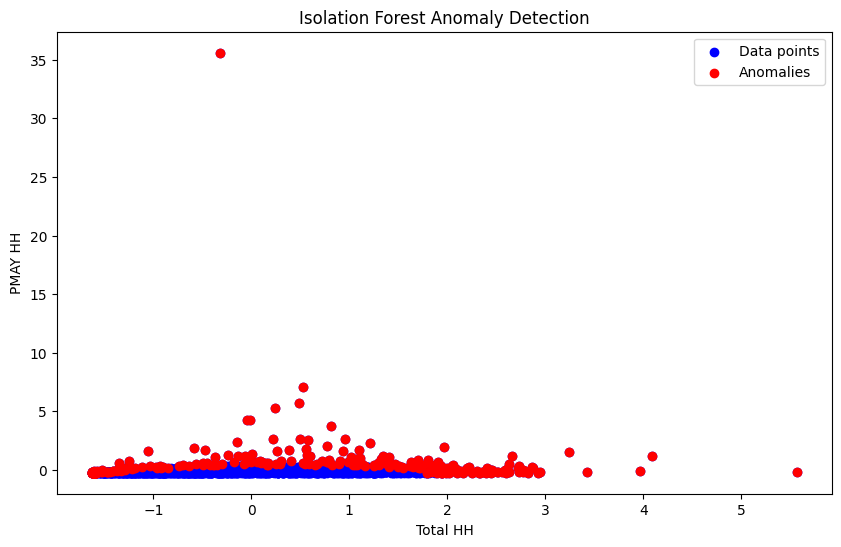

In [68]:
# import matplotlib.pyplot as plt

# # Plotting the anomalies
# plt.figure(figsize=(10, 6))

# # Plot the normalized_df points
# plt.scatter(normalized_df['Total HH'], normalized_df['PMAY HH'], c='blue', label='Data points')

# # Marking outliers
# outliers_indices = outliers == -1
# plt.scatter(normalized_df.loc[outliers_indices, 'Total HH'], normalized_df.loc[outliers_indices, 'PMAY HH'], c='red', label='Anomalies')

# plt.title('Isolation Forest Anomaly Detection')
# plt.xlabel('Total HH')
# plt.ylabel('PMAY HH')
# plt.legend()
# plt.show()



import matplotlib.pyplot as plt

# Plotting the anomalies
plt.figure(figsize=(10, 6))

# Plot the normalized_df points
plt.scatter(normalized_df['Total HH'], normalized_df['PMAY HH'], c='blue', label='Data points')

# Marking outliers
outliers_indices = outliers == -1
plt.scatter(normalized_df.loc[outliers_indices, 'Total HH'], normalized_df.loc[outliers_indices, 'PMAY HH'], c='red', label='Anomalies')

plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Total HH')
plt.ylabel('PMAY HH')
plt.legend()
plt.show()


### ELBOW METHOD --> WCSS

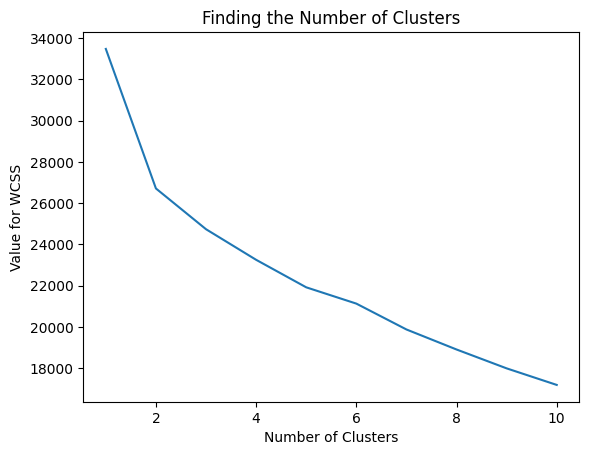

In [69]:
from sklearn.cluster import KMeans

wcss_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(normalized_df)  # Replace 'data' with your entire dataset
    wcss_list.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss_list)
plt.title('Finding the Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Value for WCSS')
plt.show()

By seeing the above plot of elbow method we can say that we can take 2 as k value ---> the number of the cluster

In [71]:
normalized_df = normalized_df1.drop(columns="Color")

### K-means ---> k-means++ initialistion

In [72]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(normalized_df)

# Convert the array to a list of strings
labels_str = [str(label) for label in y_kmeans]

# Initialize an empty string to hold the result
result = ''

# Loop through the labels and add them to the result string
for i, label in enumerate(labels_str):
    # Add the label to the result string
    result += label
    
    # Add a comma and newline character if it's not the last label
    if i < len(labels_str) - 1:
        result += ', '
        
        # Add a new line character after every 30 values
        if (i + 1) % 30 == 0:
            result += '\n'

# Print the resulting string
print(result)


0, 0, 0, 1, 1, 0, 0, 1, 2, 1, 1, 0, 0, 0, 2, 1, 0, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 0, 1, 1, 
1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 0, 0, 0, 1, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 
1, 0, 1, 0, 0, 0, 1, 1, 2, 1, 0, 1, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 
2, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 
0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2, 2, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 
0, 1, 2, 2, 0, 2, 1, 2, 0, 1, 0, 0, 0, 2, 0, 1, 2, 0, 0, 2, 1, 0, 0, 2, 1, 1, 0, 2, 1, 0, 
1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 2, 0, 0, 0, 1, 2, 1, 0, 
0, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2, 1, 1, 1, 0, 1, 0, 2, 0, 0, 2, 0, 0, 0, 
0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 2, 0, 2, 2, 1, 0, 1, 2, 0, 1, 1, 0, 0, 1, 1, 0, 0, 
1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 2, 1, 2, 0, 2, 0, 
1, 1, 0, 1, 0, 2, 2, 2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 

#### Ploting the cluster

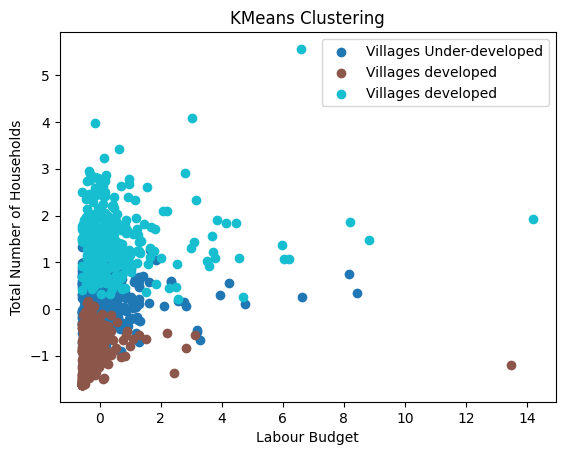

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting function
def plot_clusters(normalized_df, labels):
    # Get unique labels and assign colors
    unique_labels = np.unique(labels)
    colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))
    
    # Create a scatter plot for each cluster
    for i, label in enumerate(unique_labels):
        # Filter normalized_df points belonging to the current cluster
        cluster_data = normalized_df[labels == label]
        
        # Plot the cluster using integer indices for columns
        plt.scatter(cluster_data[:, 19], cluster_data[:, 3], color=colors[i], label=f'Villages {"Under-developed" if label == 0 else "developed"}')
    
    # Add legend and labels
    plt.title('KMeans Clustering')
    plt.xlabel('Labour Budget')
    plt.ylabel('Total Number of Households')
    plt.legend()
    plt.show()

# Plot clusters
plot_clusters(normalized_df.values, y_kmeans)

### K-Means ---> random initialisation

In [75]:
kmeans = KMeans(n_clusters = 3, init = 'random', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(normalized_df)

# Convert the array to a list of strings
labels_str = [str(label) for label in y_kmeans]

# Initialize an empty string to hold the result
result = ''

# Loop through the labels and add them to the result string
for i, label in enumerate(labels_str):
    # Add the label to the result string
    result += label
    
    # Add a comma and newline character if it's not the last label
    if i < len(labels_str) - 1:
        result += ', '
        
        # Add a new line character after every 30 values
        if (i + 1) % 30 == 0:
            result += '\n'

# Print the resulting string
print(result)


2, 2, 2, 0, 0, 2, 2, 0, 1, 0, 0, 2, 2, 2, 1, 0, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 2, 0, 0, 
0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 0, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 0, 
0, 2, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 0, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 
1, 0, 2, 2, 0, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 
2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 1, 1, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 
2, 0, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2, 2, 1, 2, 0, 1, 2, 2, 1, 0, 2, 2, 1, 0, 0, 2, 1, 0, 2, 
0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 1, 2, 2, 2, 0, 1, 0, 2, 
2, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 0, 2, 1, 1, 2, 1, 0, 0, 0, 2, 0, 2, 1, 2, 2, 1, 2, 2, 2, 
2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 0, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 
0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 1, 2, 0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 0, 1, 2, 1, 2, 
0, 0, 2, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 1, 1, 

### DBSCAN

In [76]:
from sklearn.cluster import DBSCAN

# Create the DBSCAN object with desired parameters
# You need to specify the minimum number of samples in a neighborhood and the maximum distance between points in the same cluster
# You may need to adjust these parameters based on your data
dbscan = DBSCAN(eps=0.8, min_samples=5)

# Fit the DBSCAN model to the normalized dataset
dbscan.fit(normalized_df)

# Get the labels assigned to each point by DBSCAN
labels = dbscan.labels_

labels_str = [str(label) for label in labels]

# Initialize an empty string to hold the result
result = ''

# Loop through the labels and add them to the result string
for i, label in enumerate(labels_str):
    # Add the label to the result string
    result += label
    
    # Add a comma and newline character if it's not the last label
    if i < len(labels_str) - 1:
        result += ', '
        
        # Add a new line character after every 30 values
        if (i + 1) % 30 == 0:
            result += '\n'

# Print the resulting string
print(result)


-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, 0, 0, 
-1, -1, -1, 0, 0, -1, -1, -1, -1, 0, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 
-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 
-1, 0, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 
-1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 
-1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, 0, -1, 
-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 
-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 
-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,

In [77]:
from sklearn.cluster import DBSCAN
import numpy as np

# Create the DBSCAN object with desired parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the DBSCAN model to the normalized dataset
dbscan.fit(normalized_df)

# Get the labels assigned to each point by DBSCAN
labels = dbscan.labels_

# Get the unique values of the labels
unique_labels = np.unique(labels)

# Print the unique labels
print(unique_labels)


[-1  0  1]


### Hirarchical Clustering

In [78]:
from sklearn.cluster import AgglomerativeClustering

# Initialize the AgglomerativeClustering object with the desired number of clusters
# You can adjust the number of clusters as needed
n_clusters = 3
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)

# Fit the hierarchical clustering model to the normalized data
agg_clusters = agg_clustering.fit_predict(normalized_df)
agg_clusters

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

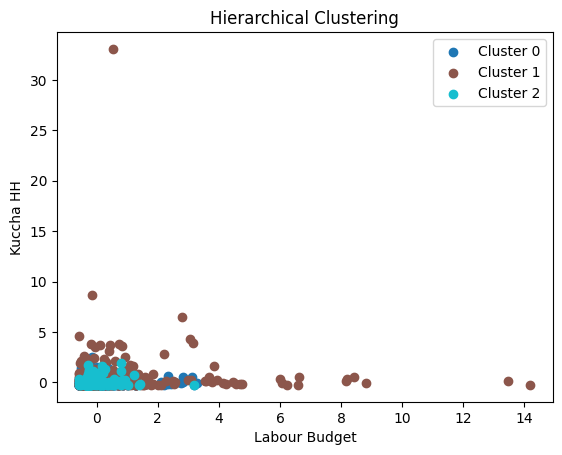

In [79]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Initialize the AgglomerativeClustering object with the desired number of clusters
# You can adjust the number of clusters as needed
n_clusters = 3
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)

# Fit the hierarchical clustering model to the normalized data
agg_clusters = agg_clustering.fit_predict(normalized_df)

# Plotting function
def plot_clusters(data, labels):
    # Get unique labels and assign colors
    unique_labels = np.unique(labels)
    colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))
    
    # Create a scatter plot for each cluster
    for i, label in enumerate(unique_labels):
        # Filter data points belonging to the current cluster
        cluster_data = data[labels == label]
        
        # Plot the cluster using integer indices for columns
        plt.scatter(cluster_data[:, 19], cluster_data[:, 10], color=colors[i], label=f'Cluster {label}')
    
    # Add legend and labels
    plt.title('Hierarchical Clustering')
    plt.xlabel('Labour Budget')
    plt.ylabel('Kuccha HH')
    plt.legend()
    plt.show()

# Plot clusters
plot_clusters(normalized_df.values, agg_clusters)


In [ ]:
normalized_df.head()

,Total Population,Male,Female,Total HH,HH Farm,HH Non-Farm,Cultivable Area,Drip/Sprinkler Farmers,Irrigated Area,Unirrigated Area,...,PMAY HH,Waitlisted HH,Benefitted HH,Waitlisted Specific HH,Saubhagya HH,Vocational Training,Total Farmers,Soil Testing Farmers,Labour Budget,Piped Water HH
0,-0.085914,-0.081243,-0.089911,-0.104026,0.252983,0.223203,0.866129,-0.180291,-0.108986,1.062216,...,0.327975,1.793437,-0.492957,-0.475397,-0.143551,0.373333,-0.008790,-0.457537,-0.315874,-0.912132
1,-0.222441,-0.181079,-0.259857,-0.295402,0.333982,-0.078852,0.797731,-0.084026,-0.126251,0.960624,...,0.012252,1.046601,-0.322594,-0.475397,-0.143551,0.077679,0.081879,-0.468795,-0.399391,-0.894067
2,-0.118900,-0.076884,-0.157201,-0.123952,-0.247650,0.119991,-0.618460,-0.188313,0.227682,-0.925953,...,-0.010300,-0.459518,-0.249582,-0.389302,11.897442,-0.137343,1.185543,-0.446278,-0.325223,-0.375611
3,-0.566147,-0.520647,-0.606439,-0.577276,-0.567743,-0.289940,-0.756133,-0.212379,-0.048558,-0.940176,...,-0.055403,-0.459518,-0.359100,-0.406521,8.551859,-0.191098,0.753041,-0.451907,-0.384465,-0.535785
4,-0.196132,-0.151813,-0.236344,-0.134746,-0.603851,-0.308017,-0.960451,-0.220401,-0.261493,-0.909698,...,-0.190713,-0.459518,-0.529463,-0.440959,-0.122835,-0.309360,0.216841,-0.451907,0.364212,0.516181


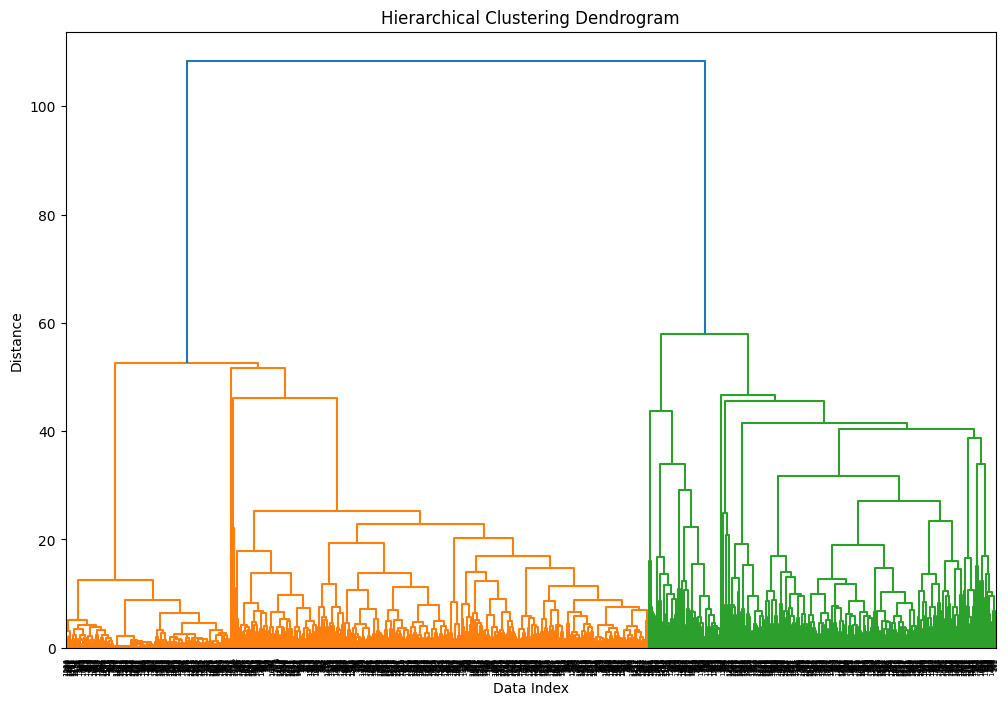

In [80]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform hierarchical clustering using linkage function
Z = linkage(normalized_df, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Index')
plt.ylabel('Distance')
plt.show()


### k-means cluster


In [81]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Assuming 'normalized_df' is your dataset loaded into a DataFrame

# Perform K-means clustering
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(normalized_df)

# Calculate cluster means
cluster_means = kmeans.cluster_centers_

# Calculate distances of each point to its cluster mean
distances_to_cluster_mean = np.linalg.norm(normalized_df.values - cluster_means[clusters], axis=1)

# Normalize distances to range [0, 1]
normalized_distances = (distances_to_cluster_mean - np.min(distances_to_cluster_mean)) / (np.max(distances_to_cluster_mean) - np.min(distances_to_cluster_mean))

# Define colors based on normalized distances
colors = ['green' if d < 0.33 else 'red' if d > 0.66 else 'blue' for d in normalized_distances]


In [82]:
# Create a list of colors based on cluster membership
colors = ['green' if label == 0 else 'red' if label == 1 else 'blue' for label in clusters]

# Add a new column 'Color' to the DataFrame with the colors of each record
normalized_df['Color'] = colors

# Save the DataFrame to a file
normalized_df.to_csv('kmeans_colored_records.csv', index=False)


In [83]:
normalized_df1 = normalized_df.drop(columns='Color')

### K-means++

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Assuming 'normalized_df1' is your dataset loaded into a DataFrame

# Perform K-means clustering with K-means++ initialization
k = 2
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(normalized_df1)

# Calculate cluster means
cluster_means = kmeans.cluster_centers_

# Calculate distances of each point to its cluster mean
distances_to_cluster_mean = np.linalg.norm(normalized_df1.values - cluster_means[clusters], axis=1)

# Normalize distances to range [0, 1]
normalized_distances = (distances_to_cluster_mean - np.min(distances_to_cluster_mean)) / (np.max(distances_to_cluster_mean) - np.min(distances_to_cluster_mean))

# Define colors based on normalized distances
colors = ['green' if d < 0.5 else 'red' for d in normalized_distances]



In [ ]:
# Create a list of colors based on cluster membership
colors = ['green' if label == 0 else 'red' for label in clusters]

# Add a new column 'Color' to the DataFrame with the colors of each record
normalized_df['Color'] = colors

# Save the DataFrame to a file
normalized_df.to_csv('k-means++_colored_records.csv', index=False)

In [124]:
normalized_df = normalized_df.drop(columns='Color')

### DBSCAN

In [125]:
# Check if any cluster is identified as noise (-1)
if -1 in clusters:
    print("DBSCAN identified noise points.")
else:
    # Calculate cluster means
    cluster_means = []
    unique_clusters = np.unique(clusters)
    num_clusters = len(unique_clusters) - 1  # Exclude noise points (-1)
    if num_clusters == 3:
        # Perform clustering again with a different epsilon value or min_samples to achieve three clusters
        print("DBSCAN detected only two clusters. Adjust parameters for three clusters.")
    else:
        for cluster in unique_clusters:
            if cluster != -1:  # Exclude noise points
                cluster_mean = np.mean(normalized_df[clusters == cluster], axis=0)
                cluster_means.append(cluster_mean)

        cluster_means = np.array(cluster_means)

        # Calculate distances of each point to its cluster mean
        distances_to_cluster_mean = np.linalg.norm(normalized_df.values - cluster_means[clusters], axis=1)

        # Normalize distances to range [0, 1]
        normalized_distances = (distances_to_cluster_mean - np.min(distances_to_cluster_mean)) / (np.max(distances_to_cluster_mean) - np.min(distances_to_cluster_mean))

        # Define colors based on normalized distances
        colors = ['green' if d < 0.4 else 'red' if d < 0.55 else 'blue' for d in normalized_distances]

        # Add a new column 'Color' to the DataFrame with the colors of each record
        normalized_df['Color'] = colors

        # Save the DataFrame to a CSV file
        normalized_df.to_csv('colored_records_dbscan1.csv', index=False)


In [126]:
if -1 in clusters:
    print("DBSCAN identified noise points.")

In [119]:
normalized_df1 =  normalized_df1.drop(columns='Color')

In [127]:
normalized_df1.shape

(1594, 22)

### Hierarchical

In [120]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler

# Assuming 'normalized_df1' is your dataset loaded into a DataFrame

# Perform hierarchical clustering
n_clusters = 3  # Adjust the number of clusters as needed
agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
clusters = agglomerative.fit_predict(normalized_df1)

# Assign colors based on cluster labels
colors = ['red', 'green', 'blue']

# Check if the number of colors matches the number of clusters
if len(colors) == n_clusters:
    # Map cluster labels to colors
    cluster_colors = dict(zip(range(n_clusters), colors))
    
    # Map cluster labels to colors for each record
    cluster_colors = np.vectorize(cluster_colors.get)(clusters)
    
    # Add a new column 'Color' to the DataFrame with the colors of each record
    normalized_df1['Color'] = cluster_colors

    # Save the DataFrame to a CSV file
    normalized_df1.to_csv('Final1_colored_records_hierarchical.csv', index=False)
else:
    print("Error: Number of colors doesn't match the number of clusters.")


In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster import hierarchy

# Assuming 'normalized_df1' is your dataset loaded into a DataFrame

# Perform hierarchical clustering
n_clusters = 3  # Adjust the number of clusters as needed
agglomerative = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
clusters = agglomerative.fit_predict(normalized_df1)

# Plot dendrogram
plt.figure(figsize=(10, 6))
plt.title('Dendrogram')
dendrogram = hierarchy.dendrogram(hierarchy.linkage(normalized_df1, method='ward'))
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


ValueError: could not convert string to float: 'red'

In [113]:
normalized_df1.columns

Index(['Total Population', 'Male', 'Female', 'Total HH', 'HH Farm',
       'HH Non-Farm', 'Cultivable Area', 'Drip/Sprinkler Farmers',
       'Irrigated Area', 'Unirrigated Area', 'Kuccha HH', 'PMAY HH',
       'Waitlisted HH', 'Benefitted HH', 'Waitlisted Specific HH',
       'Saubhagya HH', 'Vocational Training', 'Total Farmers',
       'Soil Testing Farmers', 'Labour Budget', 'Piped Water HH'],
      dtype='object')

### Correlation matrix

In [ ]:
normalized_df = normalized_df1.drop(columns='Color')

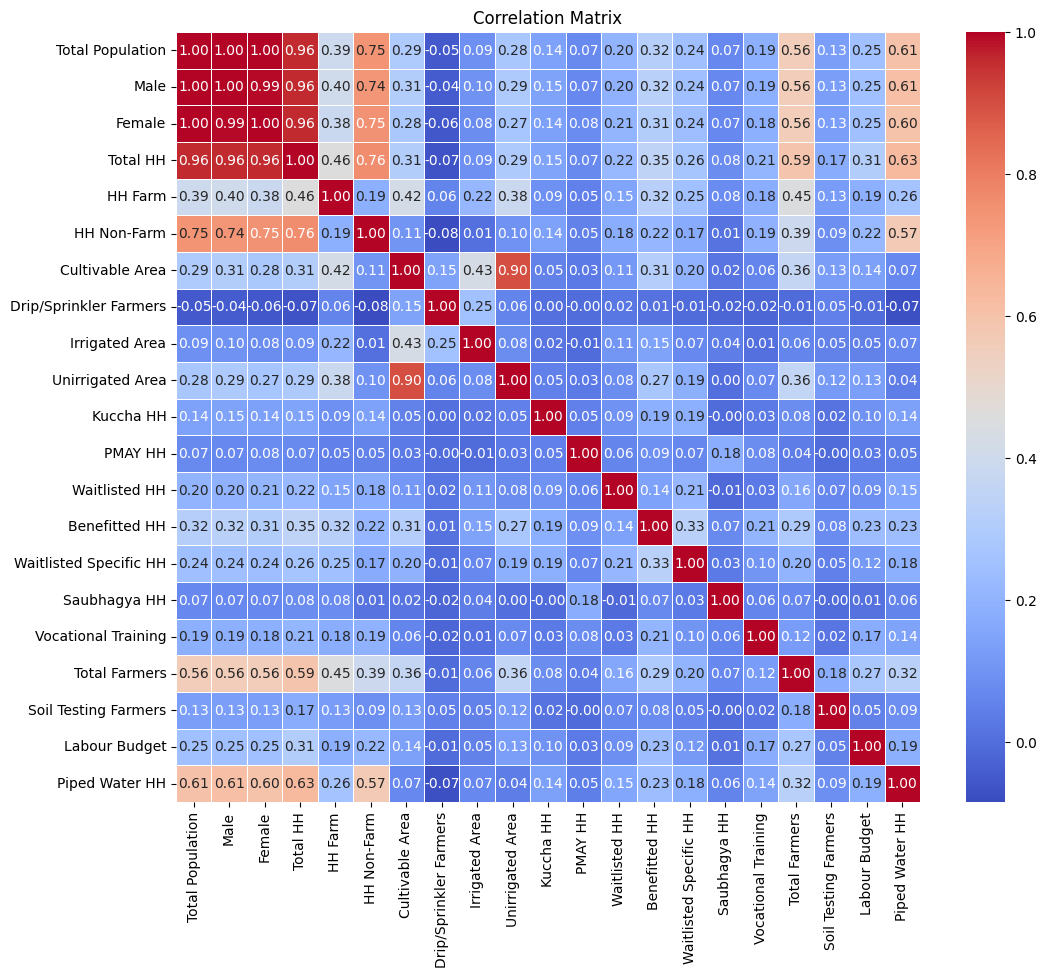

In [ ]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = normalized_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


### Plotting the kmeans cluster using two features

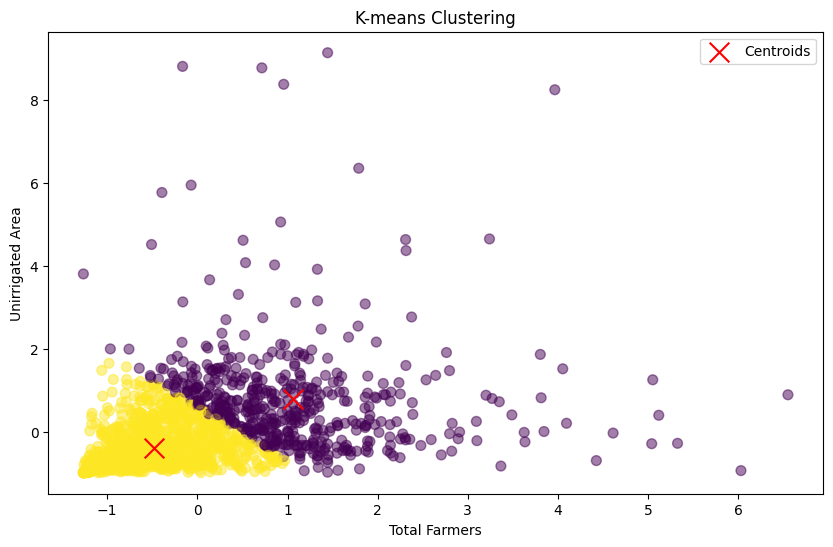

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Select the features for clustering
features = normalized_df[['Total Farmers', 'Unirrigated Area']]

# Fit the K-means algorithm
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(features)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(features.iloc[:, 0], features.iloc[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.xlabel('Total Farmers')
plt.ylabel('Unirrigated Area')
plt.title('K-means Clustering')
plt.legend()
plt.show()
